# **DECISION TREE CLASSIFIER**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_excel('heart_disease.xlsx', sheet_name = 'Heart_disease')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


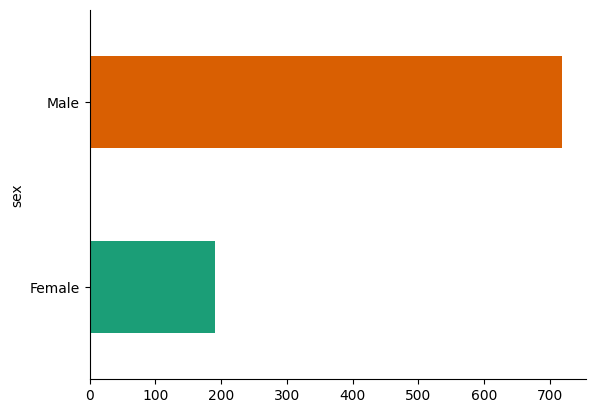

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

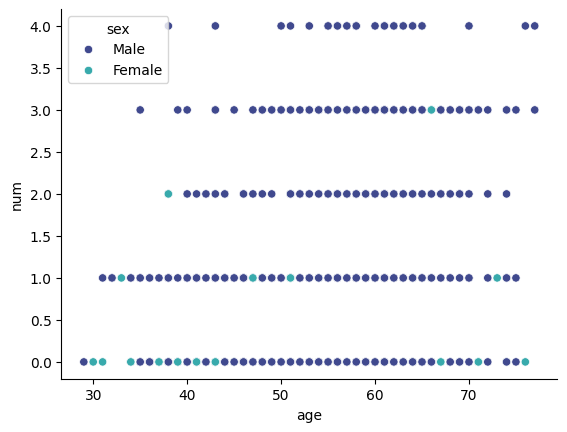

In [ ]:
sns.scatterplot(data=data, x="age", y="num", hue="sex", palette="mako")
plt.gca().spines[['top', 'right',]].set_visible(False)

**AS WE CAN SEE ONLY MALES HAVE STAGE 3 AND 4 CANCER.**

**WOMEN ARE LESS CANCER PATIENT.**

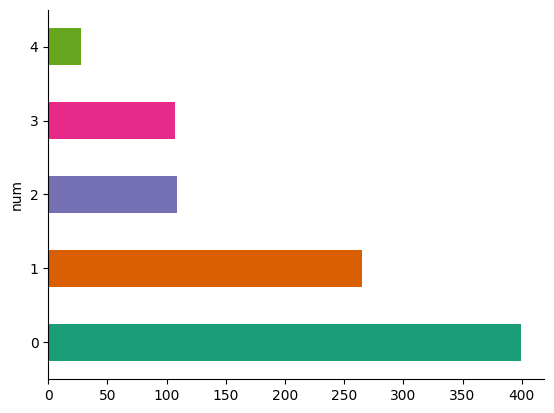

In [ ]:
data.groupby('num').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

**LESS PEOPLE HAVE STAGE 4 CANCER.**

**STAGE 2 AND 3 HAVE SAME AMOUNT OF PATIENTS.**

# **OUTLIERS TREATMENT**

<Axes: >

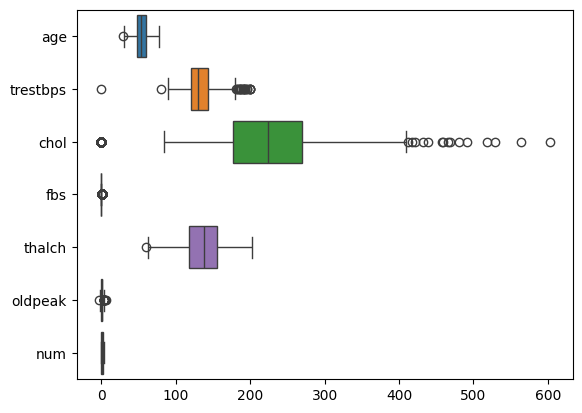

In [ ]:
sns.boxplot(data, orient = 'h')

<Axes: title={'center': 'chol'}, ylabel='Frequency'>

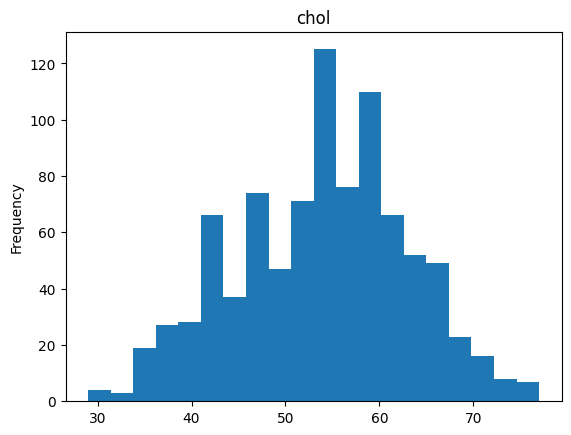

In [ ]:
from matplotlib import pyplot as plt
data['age'].plot(kind='hist', bins=20, title='chol')

<Axes: ylabel='chol'>

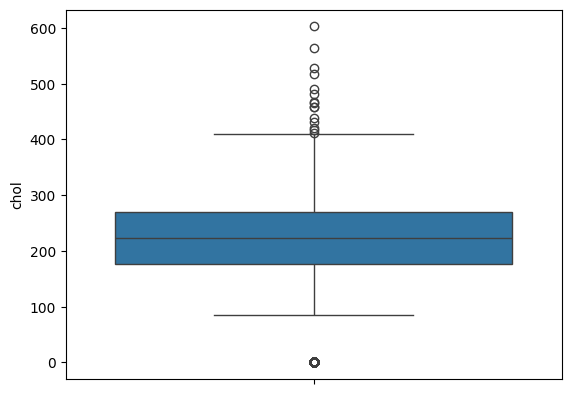

In [ ]:
import seaborn as sns
sns.boxplot(data['chol'])

In [ ]:
import numpy as np
def find_outliers_IQR(data, variable):
  IQR = np.percentile(data[variable], 75) - np.percentile(data[variable], 25)
  lower_bound = np.percentile(data[variable], 25) - 1.5 * IQR
  upper_bound = np.percentile(data[variable], 75) + 1.5 * IQR
  outliers = data[~((data[variable] >= lower_bound) & (data[variable] <= upper_bound))]
  return outliers

outliers = find_outliers_IQR(data, 'chol')
print(f'Number of outliers in chol: {len(outliers)}')

Number of outliers in chol: 187


**187 outliers are too much to delete so we will replace them with upper limit and lower limit**

In [ ]:
data.shape

(908, 13)

In [ ]:
percentile25 = data['chol'].quantile(0.25)
percentile75 = data['chol'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [ ]:
new_data = data.copy()

new_data['chol'] = np.where(
    new_data['chol'] > upper_limit,
    upper_limit,
    np.where(
        new_data['chol'] < lower_limit,
        lower_limit,
        new_data['chol']
    )
)

<ipython-input-12-a3668be3df4a>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['chol'])
<ipython-input-12-a3668be3df4a>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['chol'])


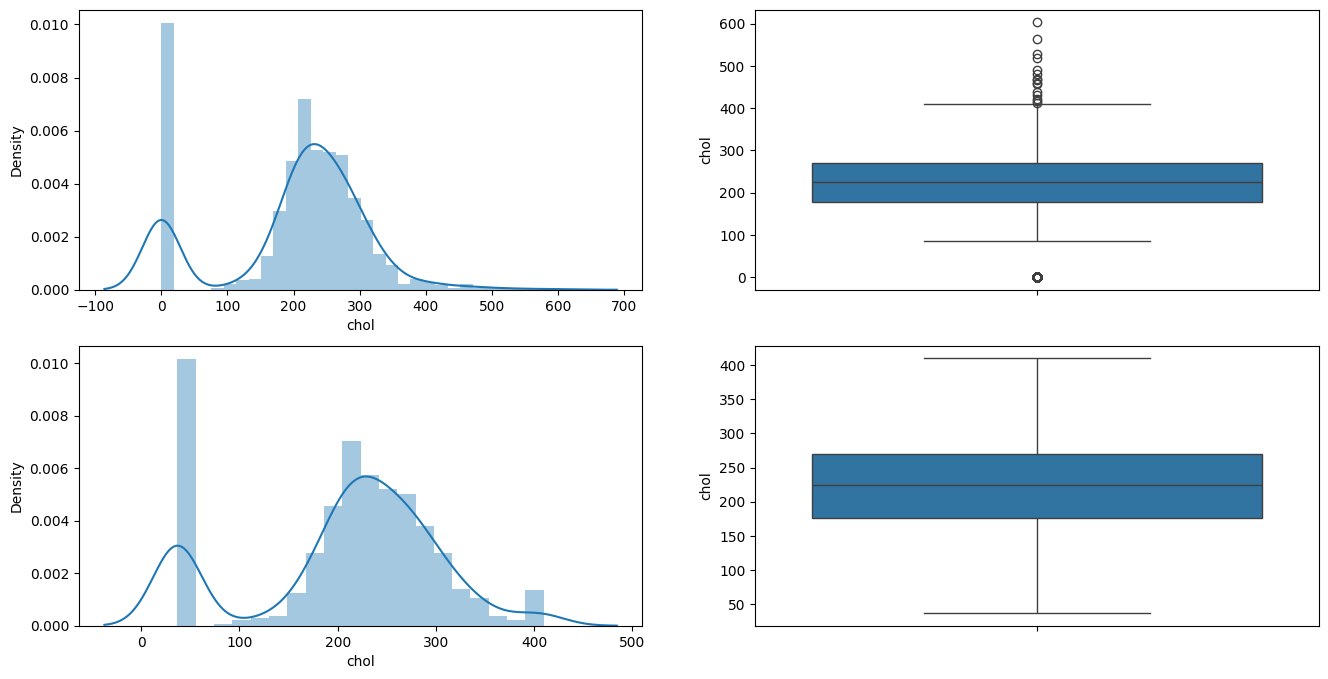

In [ ]:
# Comparing before and after
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['chol'])

plt.subplot(2,2,2)
sns.boxplot(data['chol'])

plt.subplot(2,2,3)
sns.distplot(new_data['chol'])

plt.subplot(2,2,4)
sns.boxplot(new_data['chol'])

plt.show()

In [ ]:
data.shape
new_data.shape

(908, 13)

**NOW CHECKING OUTLIERS FOR WHOLE DATA**

<Axes: >

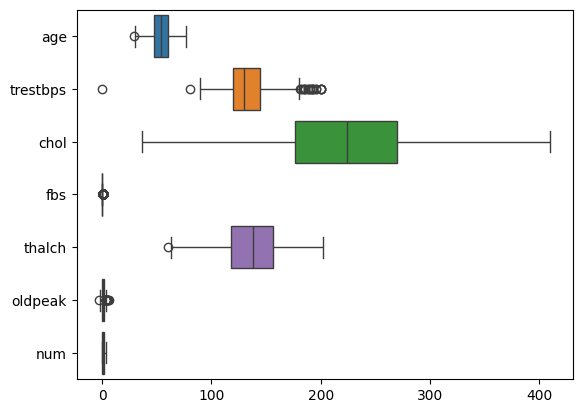

In [ ]:
import seaborn as sns
sns.boxplot(new_data, orient = 'h')

**NOW TREATING trestbps VARIABLE**

In [ ]:
percentile25 = data['trestbps'].quantile(0.25)
percentile75 = data['trestbps'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [ ]:
new_data = new_data.copy()

new_data['trestbps'] = np.where(
    new_data['trestbps'] > upper_limit,
    upper_limit,
    np.where(
        new_data['trestbps'] < lower_limit,
        lower_limit,
        new_data['trestbps']
    )
)

<Axes: >

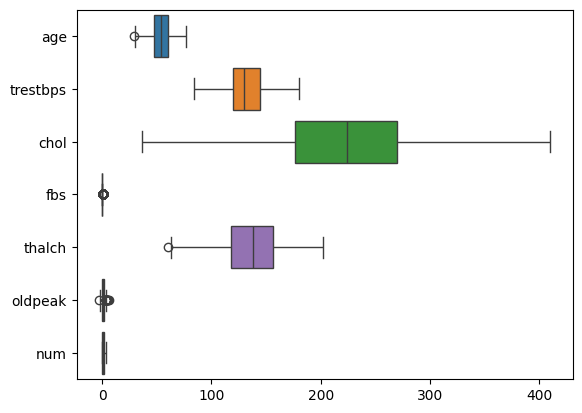

In [ ]:
sns.boxplot(new_data, orient = 'h')

**NOW FOR oldpeak VARIABLE**

<Axes: ylabel='oldpeak'>

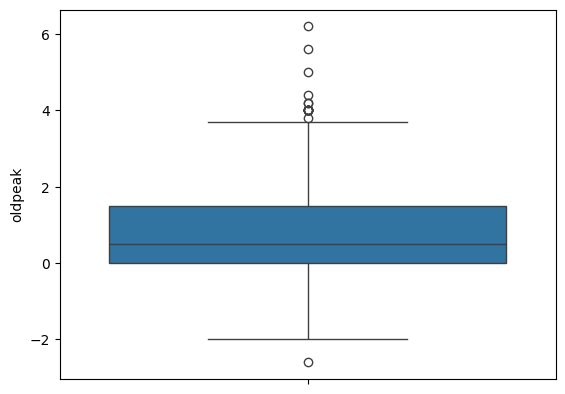

In [ ]:
sns.boxplot(data['oldpeak'])

In [ ]:
percentile25 = data['oldpeak'].quantile(0.25)
percentile75 = data['oldpeak'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [ ]:
new_data = new_data.copy()

new_data['oldpeak'] = np.where(
    new_data['oldpeak'] > upper_limit,
    upper_limit,
    np.where(
        new_data['oldpeak'] < lower_limit,
        lower_limit,
        new_data['oldpeak']
    )
)

<Axes: >

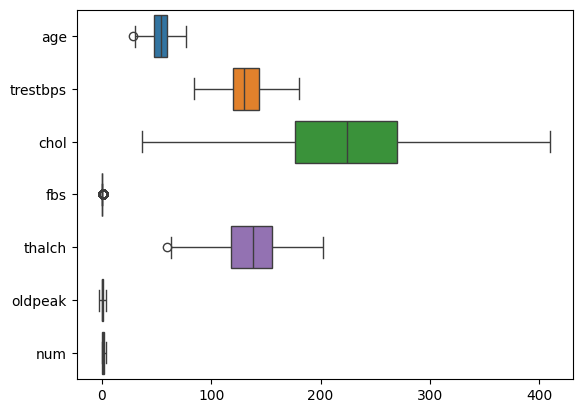

In [ ]:
sns.boxplot(new_data, orient = 'h')

In [ ]:
percentile25 = new_data['thalch'].quantile(0.25)
percentile75 = new_data['thalch'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [ ]:
new_data = new_data.copy()

new_data['thalch'] = np.where(
    new_data['thalch'] > upper_limit,
    upper_limit,
    np.where(
        new_data['thalch'] < lower_limit,
        lower_limit,
        new_data['thalch']
    )
)

<Axes: >

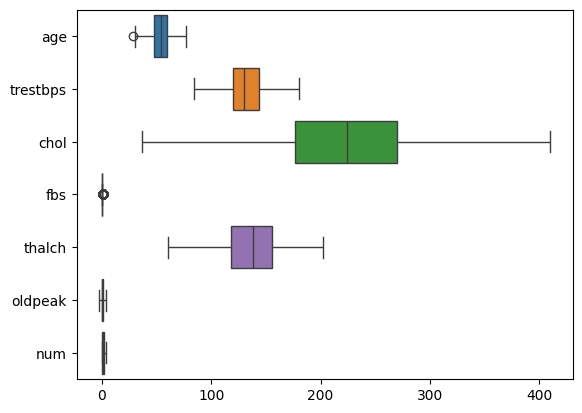

In [ ]:
sns.boxplot(new_data, orient = 'h')

# **MISSING VALUE TREATMENT**

In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    float64
 4   chol      908 non-null    float64
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    float64
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(4), int64(2), object(6)
memory usage: 86.1+ KB


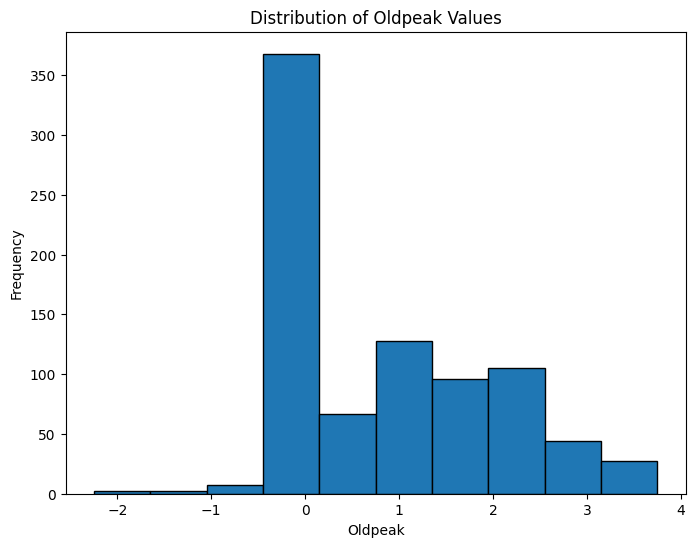

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(new_data['oldpeak'], bins=10, edgecolor='black')
plt.xlabel('Oldpeak')
plt.ylabel('Frequency')
plt.title('Distribution of Oldpeak Values')
plt.show()


**DATA IS NOT FOLLOWING NORMAL DISTRIBUTION SO WE WILL REPLACE THEM WITH MEDIAN**

In [ ]:
new_data['oldpeak'] = new_data['oldpeak'].fillna(new_data['oldpeak'].median())
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    float64
 4   chol      908 non-null    float64
 5   fbs       908 non-null    float64
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    float64
 8   exang     908 non-null    object 
 9   oldpeak   908 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: float64(5), int64(2), object(6)
memory usage: 92.3+ KB


# **LABEL ENCODING**

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in new_data.select_dtypes(include='object'):
  # Convert the column to string type before applying LabelEncoder
  new_data[col] = new_data[col].astype(str)
  new_data[col] = le.fit_transform(new_data[col])

In [ ]:
new_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145.0,233.0,0.0,0,150.0,1,2.3,0,0,0
1,41,1,1,135.0,203.0,0.0,1,132.0,1,0.0,1,0,0
2,57,1,0,140.0,192.0,0.0,1,148.0,1,0.4,1,0,0
3,52,1,3,118.0,186.0,0.0,0,190.0,1,0.0,1,0,0
4,57,1,0,110.0,201.0,0.0,1,126.0,3,1.5,1,0,0


**fbs IS IN BOOLEAN DATATYPE SO WE WILL TREAT IT SEPERATELY.**

In [ ]:
new_data['fbs'] = le.fit_transform(new_data['fbs'])

In [ ]:
new_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145.0,233.0,1,0,150.0,1,2.3,0,0,0
1,41,1,1,135.0,203.0,0,1,132.0,1,0.0,1,0,0
2,57,1,0,140.0,192.0,0,1,148.0,1,0.4,1,0,0
3,52,1,3,118.0,186.0,0,0,190.0,1,0.0,1,0,0
4,57,1,0,110.0,201.0,0,1,126.0,3,1.5,1,0,0


# **STANDARD SCALER**

In [ ]:
x_cont = new_data[['age', 'trestbps', 'chol', 'thalch', 'oldpeak']]
x_cat = new_data[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_cont_ss = scaler.fit_transform(x_cont)
x_cont_ss = pd.DataFrame(x_cont_ss, columns=x_cont.columns)

In [ ]:
x = pd.concat([x_cont_ss, x_cat], axis=1)
x.head()

,age,trestbps,chol,thalch,oldpeak,sex,cp,fbs,restecg,exang,slope,thal
0,1.006027,0.607417,0.264845,0.524203,1.411045,1,3,0.0,0,1,0,0
1,-1.397560,0.089009,-0.045006,-0.147763,-0.834669,1,1,0.0,1,1,1,0
2,0.350503,0.348213,-0.158618,0.449540,-0.444110,1,0,0.0,1,1,1,0
3,-0.195767,-0.792285,-0.220589,2.017461,-0.834669,1,3,0.0,0,1,1,0
4,0.350503,-1.207012,-0.065663,-0.371752,0.629927,1,0,0.0,1,3,1,0


In [ ]:
y = new_data['num']

In [ ]:
print(x.shape)
print(y.shape)

(908, 12)
(908,)


# **DECISION TREE CLASSIFIER**

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier( max_depth = 5, min_samples_leaf = 50, min_samples_split = 50)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=50, min_samples_split=50)

In [ ]:
n_nodes = dtc.tree_.node_count
max_depth = dtc.tree_.max_depth

print(f"Number of nodes: {n_nodes}")
print(f"Maximum depth: {max_depth}")

Number of nodes: 21
Maximum depth: 5


In [ ]:
y_pred_train = dtc.predict(x_train)
y_pred_test = dtc.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
print('Train Accuracy:', accuracy_score(y_train, y_pred_train).round(2))
print('Test Accuracy:', accuracy_score(y_test, y_pred_test).round(2))

Train Accuracy: 0.58
Test Accuracy: 0.58


# **HYPERPARAMETER TUNING**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters to search
param_grid = {
    'max_depth': range(3, 15, 1),
    'min_samples_leaf': range(20, 150, 10),
    'min_samples_split': range(20, 150, 10),
}

# Instantiate the grid search object
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print(f"Best hyperparameters: {best_params}")

# Train the model with the best hyperparameters
best_dtc = DecisionTreeClassifier(**best_params)
best_dtc.fit(x_train, y_train)

# Evaluate the model on the test set
y_pred_test = best_dtc.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Print the test accuracy
print(f"Test accuracy: {test_accuracy}")

Best hyperparameters: {'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 60}
Test accuracy: 0.5824175824175825


# **VISUALIZING TREE**

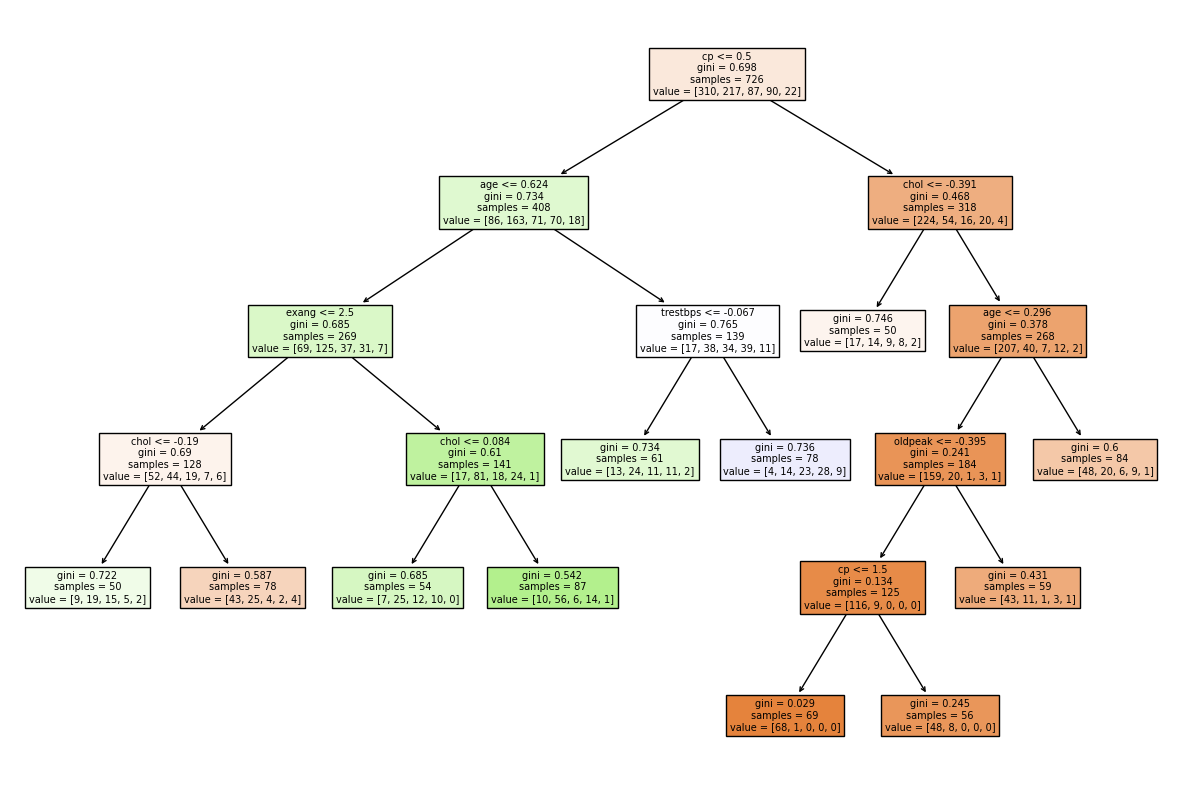

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(15, 10))
tree.plot_tree(dtc, filled="True", feature_names=x.columns)
plt.show()

# **IMPORTANT FEATURES EXTRACTION**

In [ ]:
import numpy as np
importances = dtc.feature_importances_

# Sort the features by importance in descending order
sorted_indices = np.argsort(-importances)

# Print the feature ranking
print("Feature ranking:")

for i in sorted_indices:
    print(f"{i+1}. {x.columns[i]} ({importances[i]})")


Feature ranking:
7. cp (0.5389753057326125)
3. chol (0.16865901277606432)
1. age (0.14114391631309253)
10. exang (0.0920380048136475)
2. trestbps (0.038709539456619944)
5. oldpeak (0.020474220907962932)
4. thalch (0.0)
6. sex (0.0)
8. fbs (0.0)
9. restecg (0.0)
11. slope (0.0)
12. thal (0.0)


**REMOVING THE FEATURES WITH 0 IMPORTANCE**

In [ ]:
# Identify features with zero importance
zero_importance_features = [i for i, importance in enumerate(importances) if importance == 0]

# Remove features with zero importance
x_train_reduced = x_train.drop(x_train.columns[zero_importance_features], axis=1)
x_test_reduced = x_test.drop(x_test.columns[zero_importance_features], axis=1)

# Train the model with reduced features
dtc_reduced = DecisionTreeClassifier(max_depth=6, min_samples_leaf=50, min_samples_split=50)
dtc_reduced.fit(x_train_reduced, y_train)

# Evaluate the model on the test set
y_pred_test_reduced = dtc_reduced.predict(x_test_reduced)
test_accuracy_reduced = accuracy_score(y_test, y_pred_test_reduced)

# Print the test accuracy
print(f"Test accuracy after removing zero importance features: {test_accuracy_reduced}")


Test accuracy after removing zero importance features: 0.5824175824175825


[[80  7  0  2  0]
 [20 24  0  4  0]
 [ 4 13  0  5  0]
 [ 6  9  0  2  0]
 [ 1  3  0  2  0]]


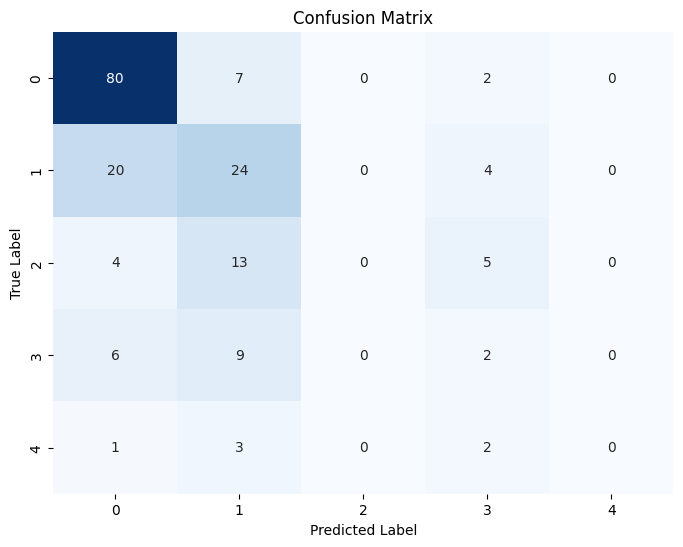

In [ ]:
from sklearn.metrics import confusion_matrix

# Predict the labels for the test set
y_pred = dtc_reduced.predict(x_test_reduced)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(cm)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


**EVEN AFTER REMOVING UNIMPORTANT FEATURES THE ACCURACY IS STILL 59%.**